In [1]:
import numpy as np
import matplotlib.pyplot as plt

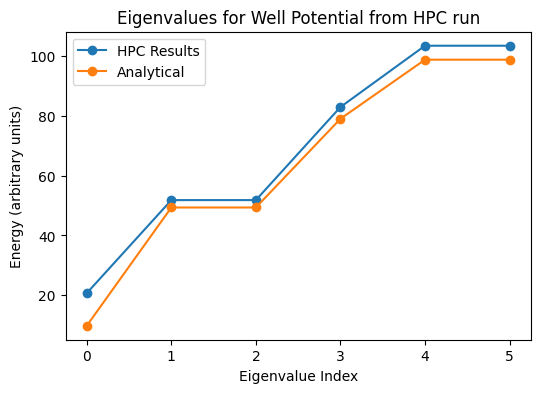

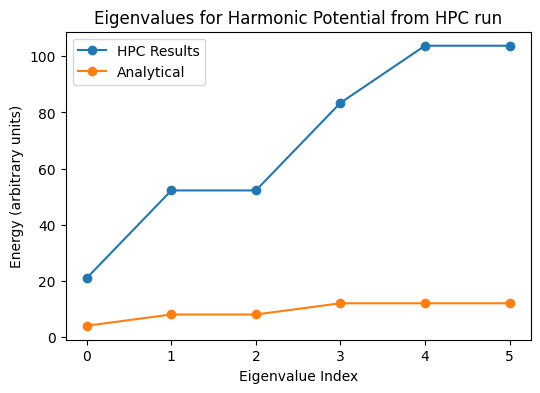

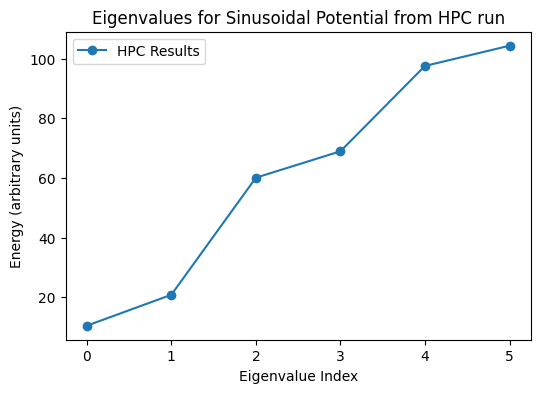

In [ ]:
# Load HPC results
N = 80 # Adjust as needed (use the largest N you ran on HPC)
potentials = ['Well', 'Harmonic', 'Sinusoidal'] # Adjust if you used a different potential
for potential in potentials:
    eigs = np.loadtxt(f'results/eigs_N{N}_V{potential}.txt')
    plt.figure(figsize=(6,4))
    plt.plot(eigs, 'o-', label='HPC Results')
    if potential == 'Well':
        # For infinite square well, analytical eigenvalues are pi^2 * (nx^2 + ny^2)
        En = [1, 5, 5, 8, 10, 10]  # (nx, ny) pairs: (1,1), (1,2), (2,1), (2,2), (3,1), (1,3)
        E = np.pi**2 * np.array(En)
        plt.plot(E, 'o-', label='Analytical')
    elif potential == 'Harmonic':
        # For isotropic harmonic oscillator with k = 8, analytical eigenvalues are 4*(nx + ny + 1)
        En = [0, 1, 1, 2, 2, 2]  # (nx, ny) pairs: (0,0), (1,0), (0,1), (1,1), (2,0), (0,2)
        E = 4. * (np.array(En) + 1)  # +1 for zero-point energy
        plt.plot(E, 'o-', label='Analytical')
    plt.xlabel('Eigenvalue Index')
    plt.ylabel('Energy (arbitrary units)')
    plt.title(f'Eigenvalues for {potential} Potential from HPC run')
    plt.legend()
    plt.savefig(f'plots/eigs_N{N}_V{potential}.pdf', bbox_inches="tight")
    plt.show()

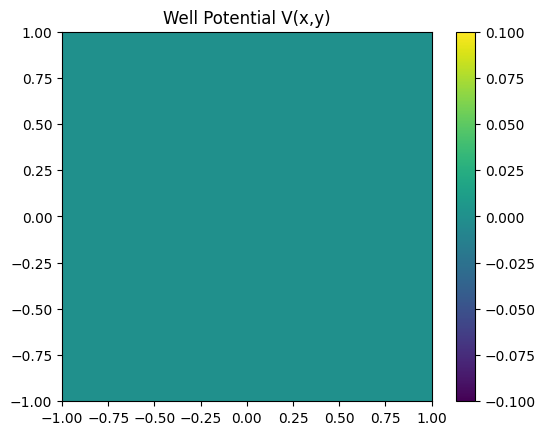

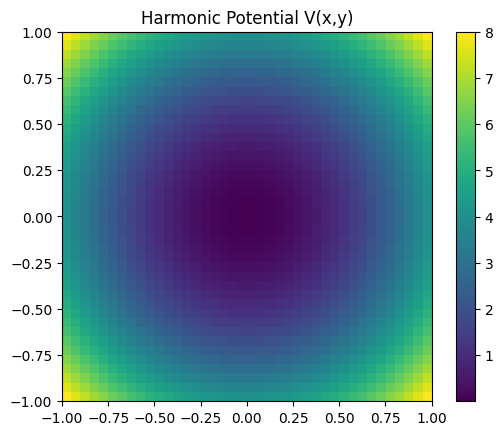

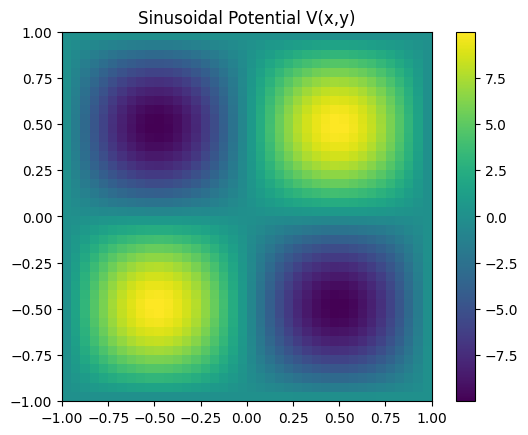

In [3]:
# Potential visualization
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)
for potential in potentials:
    if potential == 'Well':
        V = np.zeros_like(X)
    elif potential == 'Harmonic':
        V = 4. * (X**2 + Y**2)
    elif potential == 'Sinusoidal':
        V = 10. * np.sin(np.pi * X) * np.sin(np.pi * Y)
    plt.figure()
    plt.imshow(V.T, origin='lower', extent=(-1, 1,-1, 1))
    plt.colorbar()
    plt.title(potential + ' Potential V(x,y)')
    plt.savefig(f'plots/potential_{potential}.pdf', bbox_inches="tight")
    plt.show()

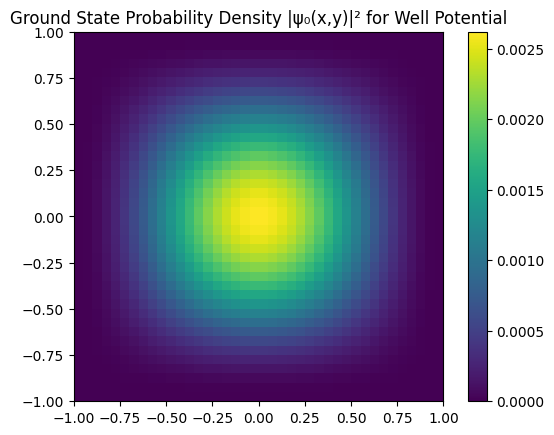

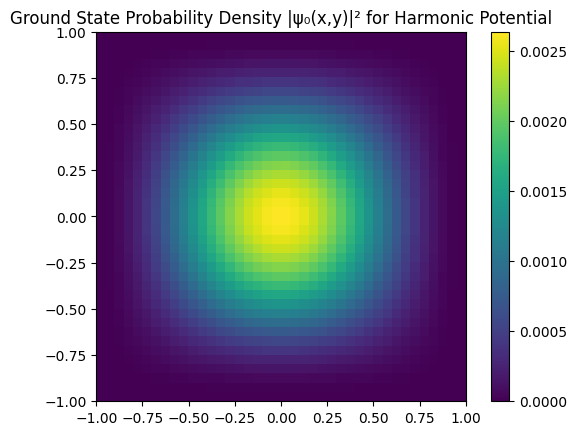

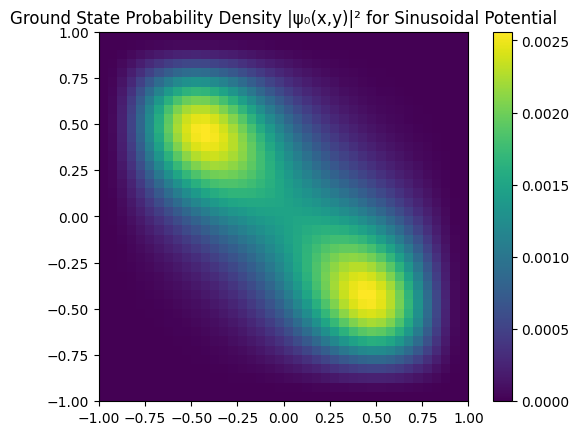

In [4]:
for potential in potentials:
    gs_prob = np.loadtxt(f'results/gsProb_N{N}_V{potential}.txt')
    plt.figure()
    plt.imshow(gs_prob.T, origin='lower', extent=(-1, 1,-1, 1))
    plt.colorbar()
    plt.title(f'Ground State Probability Density |ψ₀(x,y)|² for {potential} Potential')
    plt.savefig(f'plots/gs_prob_N{N}_V{potential}.pdf', bbox_inches="tight")
    plt.show()

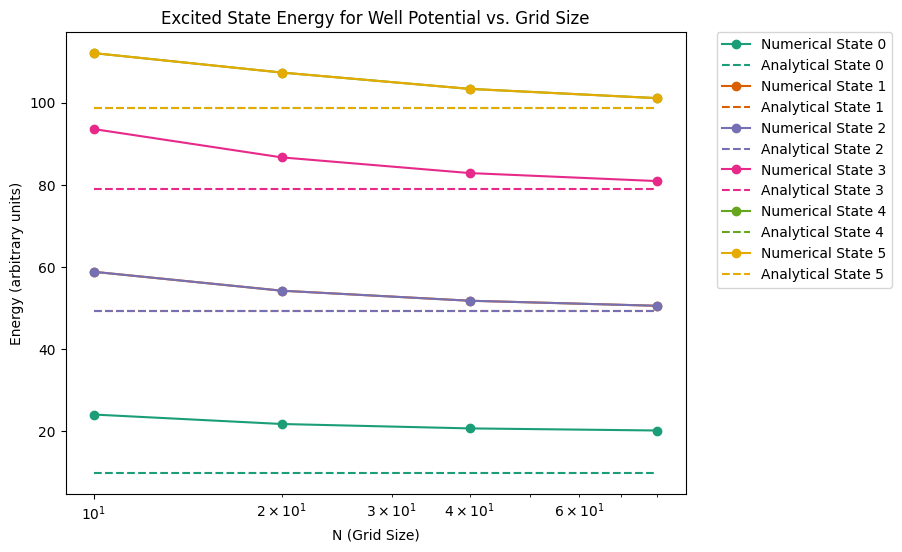

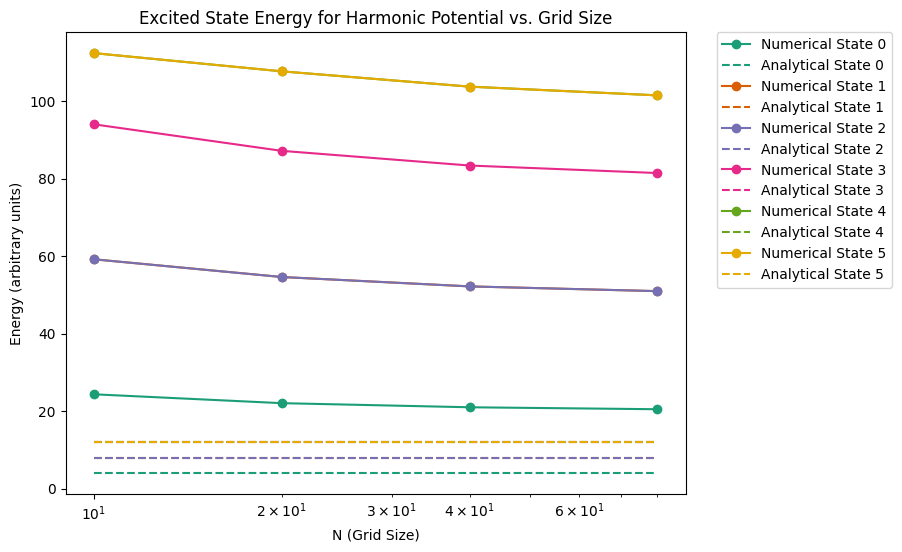

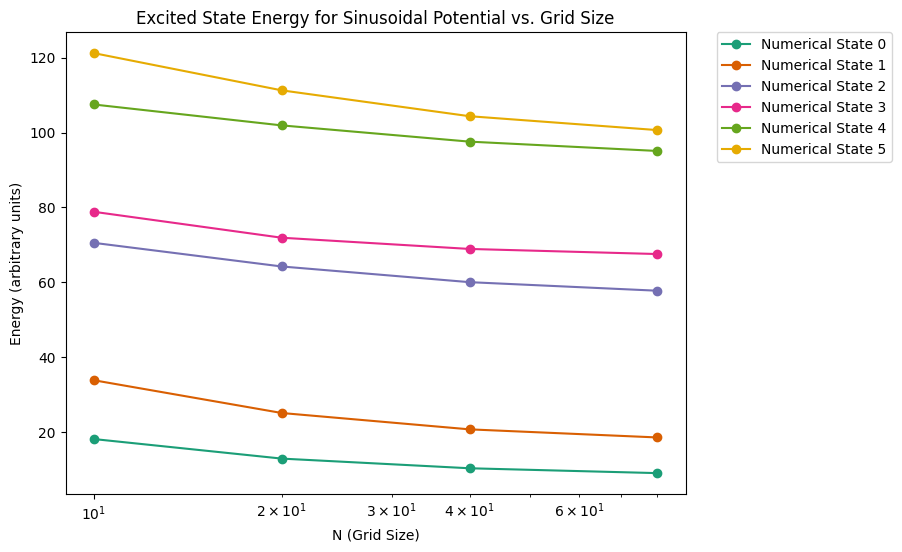

In [5]:
Ns = [10, 20, 40, 80] # Adjust as needed (use all the N values you ran on HPC)
colors = plt.color_sequences['Dark2'] # For different states
for potential in potentials:
    eigs_N10 = np.loadtxt(f'results/eigs_N10_V{potential}.txt')
    eigs_N20 = np.loadtxt(f'results/eigs_N20_V{potential}.txt')
    eigs_N40 = np.loadtxt(f'results/eigs_N40_V{potential}.txt')
    eigs_N80 = np.loadtxt(f'results/eigs_N80_V{potential}.txt')
    states = [0, 1, 2, 3, 4, 5]  # Index for the state to plot (0 for ground state, 1 for first excited state, etc.)
    plt.figure(figsize=(8,6))
    for state in states:
        plt.semilogx(Ns, [eigs_N10[state], eigs_N20[state], eigs_N40[state], eigs_N80[state]], 'o-', label=f'Numerical State {state}', color=colors[state])
        if potential == 'Well':
            # For infinite square well, analytical eigenvalues are pi^2 * (nx^2 + ny^2)
            En = [1, 5, 5, 8, 10, 10]  # (nx, ny) pairs: (1,1), (1,2), (2,1), (2,2), (3,1), (1,3)
            E = np.pi**2 * np.array(En)
            plt.semilogx(Ns, [E[state]]*len(Ns), '--', label=f'Analytical State {state}', color=colors[state])
        elif potential == 'Harmonic':
            # For isotropic harmonic oscillator with k = 8, analytical eigenvalues are 4*(nx + ny + 1)
            En = [0, 1, 1, 2, 2, 2]  # (nx, ny) pairs: (0,0), (1,0), (0,1), (1,1), (2,0), (0,2)
            E = 4. * (np.array(En) + 1)  # +1 for zero-point energy
            plt.semilogx(Ns, [E[state]]*len(Ns), '--', label=f'Analytical State {state}', color=colors[state])
    plt.xlabel('N (Grid Size)')
    plt.ylabel('Energy (arbitrary units)')
    plt.title(f'Excited State Energy for {potential} Potential vs. Grid Size')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.savefig(f'plots/convergence_V{potential}.pdf', bbox_inches="tight")
    plt.show()